## Observations and Insights 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


%matplotlib inline

# Study data files
mouse_metadata_path = 'Data/Mouse_metadata.csv'
study_results_path = 'Data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')
merge2_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='inner')
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [23]:
# Checking the number of mice.
##.astype(float)
#df["price1"].round(4).apply(str)
number_of_mice = merge_df['Mouse ID'].nunique()
print('Number of mice ' + format(number_of_mice, ',.0f') )

Number of mice 249


In [24]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
group_df = merge_df.groupby(merge_df.columns.tolist())
duplicate_df = group_df.size().reset_index() # reset in dex with size value, number of records
duplicate_df = duplicate_df[duplicate_df[0] > 1]       # return only size index greater than 1, last column 

mouse_id = duplicate_df['Mouse ID'].values
duplicated_mouse_id =  ', '.join(mouse_id)
print('Duplicated Mouse ID is ' + duplicated_mouse_id)

Duplicated Mouse ID is g989


In [25]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = merge_df.loc[(merge_df['Mouse ID'] == duplicated_mouse_id ),:]
duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [26]:
duplicated_df.shape

(13, 8)

In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.loc[~(merge_df['Mouse ID'] == duplicated_mouse_id ),:]

In [28]:
# Checking the number of mice in the clean DataFrame.
# 13 duplicated records are removed from merged data 1893
clean_df.shape

(1880, 8)

## Summary Statistics

In [29]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_group_df = clean_df.groupby(['Drug Regimen'])

dr_mean = clean_group_df['Tumor Volume (mm3)'].mean()
dr_median = clean_group_df['Tumor Volume (mm3)'].median()
dr_var = clean_group_df['Tumor Volume (mm3)'].var()
dr_std = clean_group_df['Tumor Volume (mm3)'].std()
dr_sem = clean_group_df['Tumor Volume (mm3)'].sem()

# create summary data frame
summary_df = pd.DataFrame({'Tumor Volume mean':dr_mean,
                           'Tumor Volume median':dr_median,
                           'Tumor Volume variance':dr_var,
                           'Tumor Volume standard deviation':dr_std,
                           'Tumor Volume standard error of the mean':dr_sem
                            })

summary_df

,Tumor Volume mean,Tumor Volume median,Tumor Volume variance,Tumor Volume standard deviation,Tumor Volume standard error of the mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

clean_group_df = clean_df.groupby(['Drug Regimen'])
clean_group_df['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [31]:
clean_group_df.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


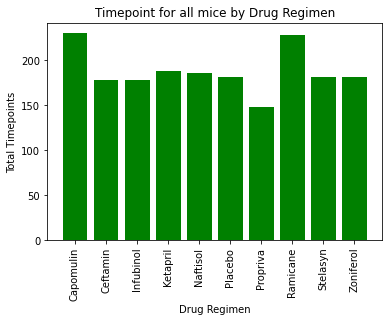

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# get y axix values
timepoint_count = clean_group_df['Timepoint'].count()

#get x axis number of points
x_axis = np.arange(len(clean_group_df))

# get a list of drug names for x axis labels
temp_df = clean_group_df.count()
list_of_drugs = list(temp_df.index.values.tolist())

# plot the bar graph in green
plt.bar(x_axis, timepoint_count, color = 'g', align = 'center')

# create the ticks for bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list_of_drugs, rotation = 'vertical')

# name the chart a title, x label, and y label
plt.title('Timepoint for all mice by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')

# Save an image of the chart and print it to the screen
plt.savefig('Images/DrugRegimen_bar.png')
plt.show()

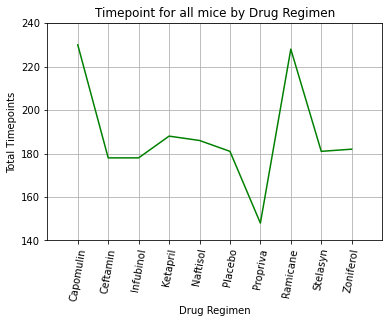

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# plot a line graph in green
timepoints, = plt.plot(x_axis, timepoint_count, color ='g')

# Set the limits for the X and Y axes
plt.xlim(-1,10)
plt.ylim(140,240)

# create the ticks for bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, list_of_drugs, rotation = '80')

# name the chart a title, x label, and y label
plt.title('Timepoint for all mice by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Timepoints')

# add in a grid for the chart
plt.grid()

# save an image of the chart and print it to the screen
plt.savefig('Images/DrugRegimen_line.png')
plt.show()

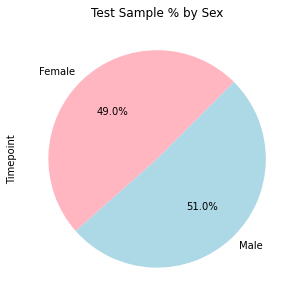

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# get count by sex
clean_group_df = clean_df.groupby(['Sex'])
sex_group_df = pd.DataFrame(clean_group_df['Timepoint'].count())

# plot pie chat using pandas
colors = ["lightpink", "lightblue"]
plot = sex_group_df.plot.pie(y='Timepoint', figsize=(5, 5), autopct='%1.1f%%', startangle=45, 
                                 legend = False, title='Test Sample % by Sex', colors=colors)


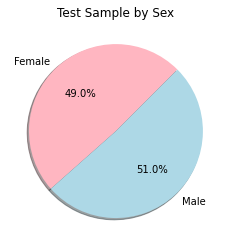

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
clean_group_df = clean_df.groupby(['Sex'])
timepoint_count = clean_group_df['Timepoint'].count()

# labels for the sections of our pie chart
temp_df = clean_group_df.count()
labels = list(temp_df.index.values.tolist())

# values of each section of the pie chart
sizes = clean_group_df['Timepoint'].count()

# colors of each section of the pie chart
colors = ["lightpink", "lightblue"]

# plot pie chart
plt.pie(sizes, labels=labels, colors=colors,autopct="%1.1f%%",
        shadow=True, startangle=45)
plt.title("Test Sample by Sex");

# save an image of the chart and print it to the screen
plt.savefig('Images/TestSamplebySex_pie_pyplot.png')
plt.show()


## Quartiles, Outliers and Boxplots

In [123]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

clean_group_df = clean_df[['Mouse ID','Timepoint']]

# Start by getting the last (greatest) timepoint for each mouse
clean_group_max_df = clean_group_df.sort_values('Timepoint').groupby(['Mouse ID']).tail(1)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df, clean_group_max_df, how='inner', on=['Mouse ID','Timepoint'] )

# filter for the four treatment regimens
treatment_regimens = ['Capomulin','Ramicane','Infubinol','Ceftamin']

drug_list_final_df = merged_df[merged_df['Drug Regimen'].str.contains('|'.join(treatment_regimens))]

drug_list_final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
234,x822,Ceftamin,Male,3,29,45,61.386660,3
236,y163,Infubinol,Female,17,27,45,67.685569,3
240,y769,Ceftamin,Female,6,27,45,68.594745,4
241,y865,Ceftamin,Male,23,26,45,64.729837,3


In [193]:
# Put treatments into a list for for loop (and later for plot labels) 
treatment_regimens = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
drug_list_df = clean_df[clean_df['Drug Regimen'].str.contains('|'.join(treatment_regimens))]  
   
# add subset 
drug_list_df = drug_list_df['Tumor Volume (mm3)'] 
    
# Determine outliers using upper and lower bounds
quartiles = xx_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
    

The lower quartile of tumor volumes is: 40.2201707875
The upper quartile of tumor volumes is: 50.356470630000004
The interquartile range of tumor volumes is: 10.136299842500001
The the median of tumor volumes is: 45.0 
Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.


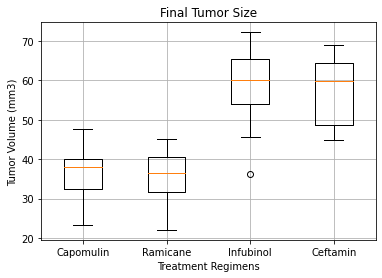

In [194]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# should use the list above to create the data set
Capomulin = drug_list_final_df[(drug_list_final_df['Drug Regimen'] == 'Capomulin')]['Tumor Volume (mm3)']
Ramicane = drug_list_final_df[(drug_list_final_df['Drug Regimen'] == 'Ramicane')]['Tumor Volume (mm3)']
Infubinol = drug_list_final_df[(drug_list_final_df['Drug Regimen'] == 'Infubinol')]['Tumor Volume (mm3)']
Ceftamin = drug_list_final_df[(drug_list_final_df['Drug Regimen'] == 'Ceftamin')]['Tumor Volume (mm3)']

drug_data_df = [Capomulin, Ramicane, Infubinol, Ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Size')
ax1.set_xlabel('Treatment Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(drug_data_df, labels=treatment_regimens)
plt.grid()

# save an image of the line chart and print it to the screen
plt.savefig('Images/FinalTumorSizebyTreatmentRegimens_box_pyplot.png')
plt.show()

## Line and Scatter Plots

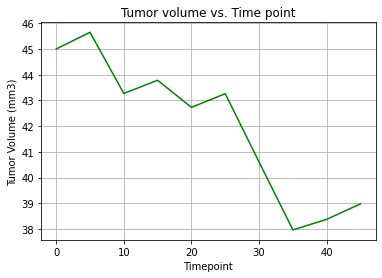

In [195]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#filter clean data set for Capomulin
capomulin_drug_df = clean_df[(clean_df['Drug Regimen'] == 'Capomulin')] 

# select a mouse, ie, minimum mouse id value
mouse_id = capomulin_drug_df['Mouse ID'].min()

# get all the rows from the select mouse id
capomulin_mouse_df = capomulin_drug_df[(capomulin_drug_df['Mouse ID'] == mouse_id)] 

# get time pint and tumor volume
timepoint_x = capomulin_mouse_df['Timepoint']
tumor_vol_y = capomulin_mouse_df['Tumor Volume (mm3)']

# plot line plot
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor volume vs. Time point')
plt.plot(timepoint_x, tumor_vol_y,  color = 'g')
plt.grid()

# save an image of the line chart and print it to the screen
plt.savefig('Images/TumorVolumebyTimepoint_line_pyplot.png')
plt.show()

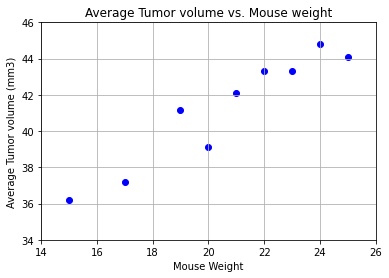

In [204]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#filter clean data set for Capomulin
capomulin_drug_df = clean_df[(clean_df['Drug Regimen'] == 'Capomulin')] 

# group by weight
capomulin_drug_group_df = capomulin_drug_df.groupby(['Weight (g)'])

# get average tumor volume
tumor_vol_y  = capomulin_drug_group_df['Tumor Volume (mm3)'].mean()

# get weights tumor volume
mouse_weight_x = capomulin_drug_group_df['Weight (g)'].unique()

# plot scatter plot
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor volume (mm3)')
plt.title('Average Tumor volume vs. Mouse weight')
plt.ylim(34,46)
plt.xlim(14,26)
plt.grid()

plt.scatter(mouse_weight_x, tumor_vol_y, marker='o', facecolors='blue')

# save an image of the scatter plot and print it to the screen
plt.savefig('Images/AvgTumorVolbyMouseWeight_scatter_pyplot.png')
plt.show()

## Correlation and Regression

In [206]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight_x = [15,17,19,20,21,22,23,24,25]
correlation = st.pearsonr(mouse_weight_x,tumor_vol_y)
print(f"The correlation between mouse weight and tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and tumor volume is 0.95


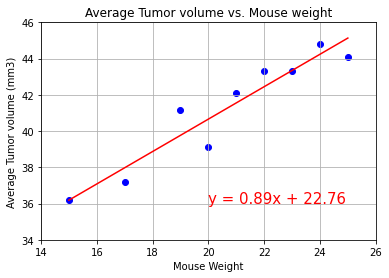

In [209]:
# liner regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight_x, tumor_vol_y)

mouse_weight_df = pd.DataFrame(mouse_weight_x)

# calculate linear regression
regress_values = mouse_weight_df * slope + intercept

# linear regression line and equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# scatter plot with liner regression line and equation
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor volume (mm3)')
plt.title('Average Tumor volume vs. Mouse weight')
plt.ylim(34,46)
plt.xlim(14,26)

plt.scatter(mouse_weight_x, tumor_vol_y, marker='o', facecolors='blue' )
plt.plot(mouse_weight_x,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.grid()

# save an image of the scatter plot and print it to the screen
plt.savefig('Images/AvgTumorVolbyMouseWeight_linear_pyplot.png')
plt.show()